# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [32]:
#Ron Twito 2995
#omer zaadi 0628

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [48]:
# Load libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline





# Load datasets
wine_train = pd.read_csv('wine_train.csv')
wine_test  = pd.read_csv('wine_test.csv')

#show the first 5 rows of the data sets
display(wine_train.head())
display(wine_test.head())




,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [49]:
print("Statistics for Train Dataset:")
display(wine_train.describe())

print("Statistics for Test Dataset:")
display(wine_test.describe())

Statistics for Train Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


Statistics for Test Dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.013889,2.488611,2.385556,19.791667,98.944444,2.212778,1.893889,0.421667,1.705278,5.168056,0.953056,2.504444,764.388889,1.000000
std,0.904962,1.210778,0.238716,3.308550,16.626905,0.569845,0.974970,0.134302,0.678846,2.637680,0.264303,0.676096,309.252950,0.792825
min,11.030000,0.990000,1.950000,14.000000,70.000000,1.350000,0.470000,0.200000,0.410000,1.740000,0.560000,1.270000,315.000000,0.000000
25%,12.320000,1.670000,2.207500,16.950000,89.000000,1.725000,0.897500,0.290000,1.297500,3.292500,0.722500,1.990000,520.000000,0.000000
50%,13.110000,1.900000,2.310000,20.000000,96.000000,2.250000,1.940000,0.425000,1.690000,4.475000,0.975000,2.600000,680.000000,1.000000
75%,13.757500,3.202500,2.560000,22.000000,102.250000,2.755000,2.765000,0.530000,2.042500,6.337500,1.092500,2.932500,1001.250000,2.000000
max,14.830000,5.800000,2.920000,28.500000,162.000000,3.100000,3.400000,0.660000,3.280000,13.000000,1.710000,3.920000,1510.000000,2.000000


C:\Users\Ron\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


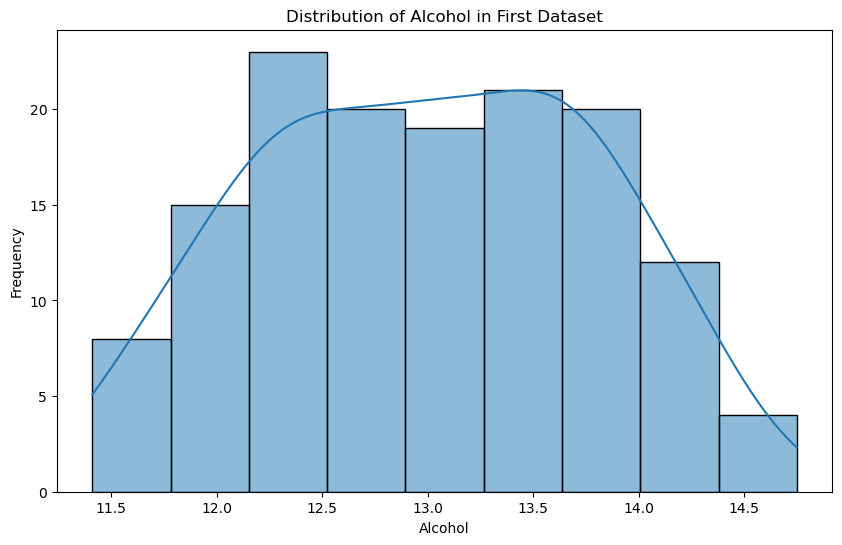

In [50]:
# ויזואליזציה 1: היסטוגרמה של עמודת 'alcohol' בדאטה סט הראשון
plt.figure(figsize=(10, 6))
sns.histplot(wine_train['alcohol'], kde=True)
plt.title('Distribution of Alcohol in First Dataset')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()







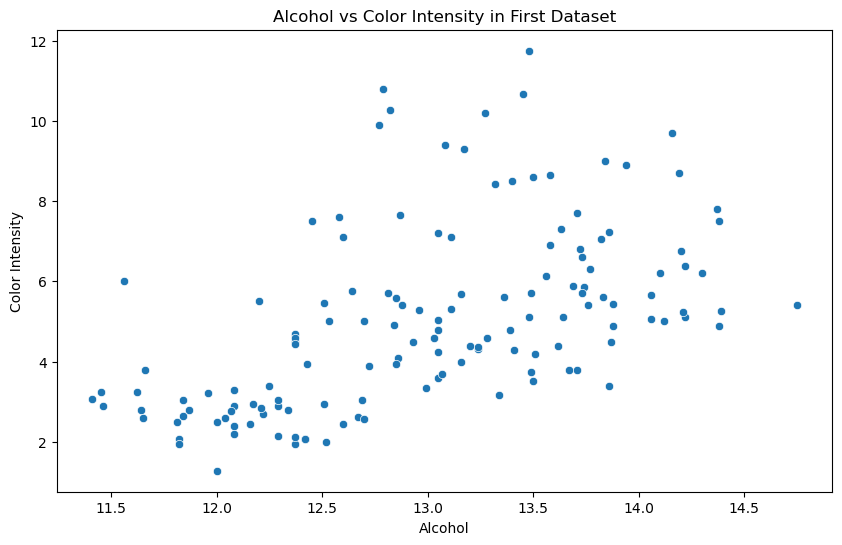

In [51]:
# ויזואליזציה 2: גרף פיזור בין 'alcohol' ו-'color_intensity' בדאטה סט הראשון
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='color_intensity', data=wine_train)
plt.title('Alcohol vs Color Intensity in First Dataset')
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.show()

C:\Users\Ron\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


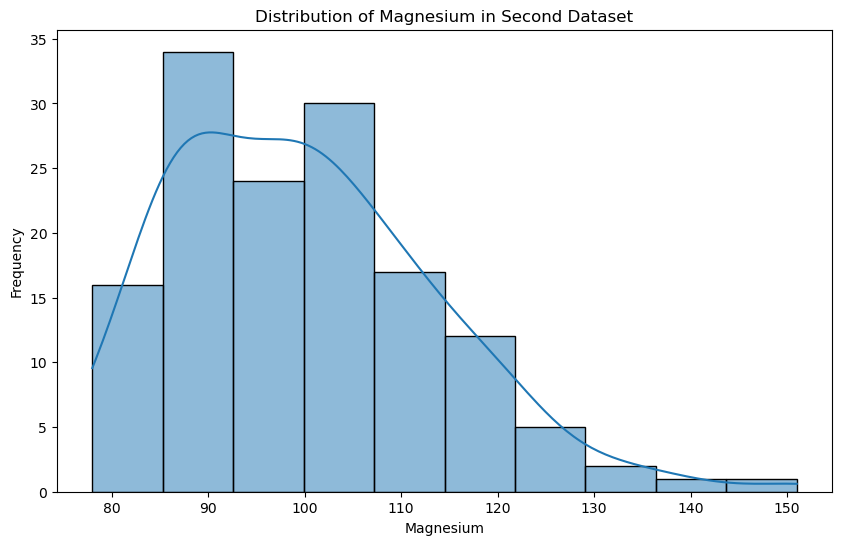

In [52]:
# ויזואליזציה 3: היסטוגרמה של עמודת 'magnesium' בדאטה סט השני
plt.figure(figsize=(10, 6))
sns.histplot(wine_train['magnesium'], kde=True)
plt.title('Distribution of Magnesium in Second Dataset')
plt.xlabel('Magnesium')
plt.ylabel('Frequency')
plt.show()

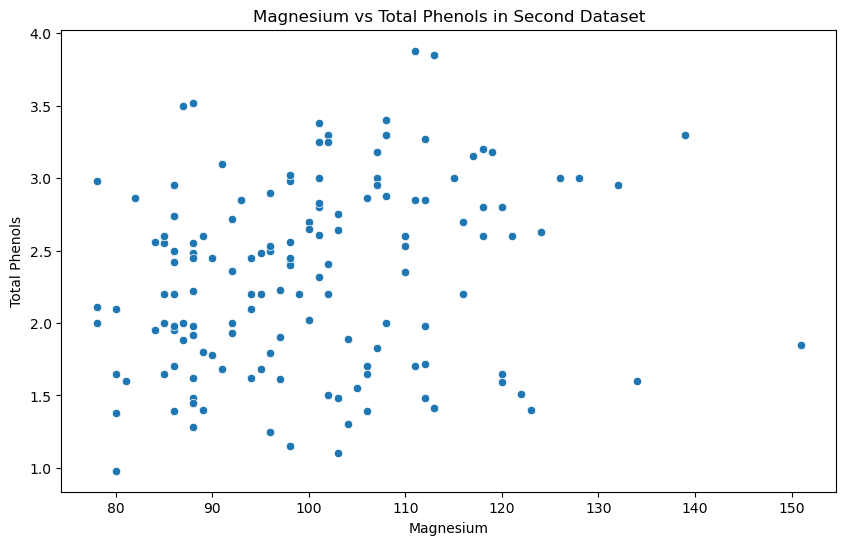

In [53]:
# ויזואליזציה 4: גרף פיזור בין 'magnesium' ו-'total_phenols' בדאטה סט השני
plt.figure(figsize=(10, 6))
sns.scatterplot(x='magnesium', y='total_phenols', data=wine_train)
plt.title('Magnesium vs Total Phenols in Second Dataset')
plt.xlabel('Magnesium')
plt.ylabel('Total Phenols')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [54]:
# Feature Engineering - Scaling and Polynomial Features
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, include_bias=False)

# Scaling and Polynomial Transformation on training data
X_train_scaled = scaler.fit_transform(wine_train.drop('target', axis=1))
X_train_poly = poly.fit_transform(X_train_scaled)

# Applying the same scaling on the test data
X_test_scaled = scaler.transform(wine_test.drop('target', axis=1))
X_test_poly = poly.transform(X_test_scaled)

# Define models
models = {
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier()
}

# Define hyperparameters for each model
params = {
    'KNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
    'RandomForest': {'n_estimators': [100, 200], 'max_depth': [5, 10]}
}

# Grid search with 5-fold cross-validation
best_estimators = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, params[name], cv=5, scoring='f1_macro')
    grid_search.fit(X_train_poly, wine_train['target'])
    best_estimators[name] = grid_search.best_estimator_
    display(f"Best params for {name}: {grid_search.best_params_}")

# Evaluate on the test set
for name, model in best_estimators.items():
    y_pred = model.predict(X_test_poly)
    display(f"{name} classification report:")
    display(classification_report(wine_test['target'], y_pred))

# Summary of model performances
results = pd.DataFrame({
    'Model': ['KNN', 'RandomForest'],
    'F1-Score (Train)': [f1_score(wine_train['target'], best_estimators['KNN'].predict(X_train_poly), average='macro'),
                         f1_score(wine_train['target'], best_estimators['RandomForest'].predict(X_train_poly), average='macro')],
    'F1-Score (Test)': [f1_score(wine_test['target'], best_estimators['KNN'].predict(X_test_poly), average='macro'),
                        f1_score(wine_test['target'], best_estimators['RandomForest'].predict(X_test_poly), average='macro')]
})

display(results)


"Best params for KNN: {'n_neighbors': 7, 'weights': 'uniform'}"

"Best params for RandomForest: {'max_depth': 10, 'n_estimators': 100}"

'KNN classification report:'

'              precision    recall  f1-score   support\n\n           0       0.79      1.00      0.88        11\n           1       1.00      0.71      0.83        14\n           2       0.92      1.00      0.96        11\n\n    accuracy                           0.89        36\n   macro avg       0.90      0.90      0.89        36\nweighted avg       0.91      0.89      0.89        36\n'

'RandomForest classification report:'

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        11\n           1       1.00      1.00      1.00        14\n           2       1.00      1.00      1.00        11\n\n    accuracy                           1.00        36\n   macro avg       1.00      1.00      1.00        36\nweighted avg       1.00      1.00      1.00        36\n'

,Model,F1-Score (Train),F1-Score (Test)
0,KNN,0.959199,0.889952
1,RandomForest,1.000000,1.000000


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [55]:
# שימוש בקומבינציה המוצלחת ביותר (בהנחה שRandomForest וה-engineering הזה נבחרו)
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, include_bias=False)

# החלת scaling ו-polynomial על כל ה-train dataset
X_train_scaled = scaler.fit_transform(wine_train.drop('target', axis=1))
X_train_poly = poly.fit_transform(X_train_scaled)

# הגדרת המודל עם ההיפרפרמטרים הנבחרים
best_model = RandomForestClassifier(n_estimators=200, max_depth=10)

# אימון המודל מחדש עם כל ה-train dataset
best_model.fit(X_train_poly, wine_train['target'])

# הצגת התוצאות על ה-train dataset (תוכל גם לבדוק מול ה-test dataset בנפרד)
y_train_pred = best_model.predict(X_train_poly)
print("Train Classification Report:")
print(classification_report(wine_train['target'], y_train_pred))

Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        37

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



## Part 5 - Apply on test and show model performance estimation

In [47]:
# 1. החלת feature engineering על ה-test set
X_test_scaled = scaler.transform(wine_test.drop('target', axis=1))  # Apply scaling
X_test_poly = poly.transform(X_test_scaled)  # Apply polynomial transformation

# 2. חיזוי על ה-test set באמצעות המודל המאומן
y_test_pred = best_model.predict(X_test_poly)

# 3. הצגת 5 התוצאות הראשונות של החיזוי
print("First 5 predictions on the test set:")
print(y_test_pred[:5])

# 4. בדיקת איכות המודל באמצעות classification_report
print("Test Classification Report:")
print(classification_report(wine_test['target'], y_test_pred))


First 5 predictions on the test set:
[2 0 2 1 2]
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

